In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cali_13 = pd.read_csv('data/cali_metros_13.csv')
cali_14 = pd.read_csv('data/cali_metros_14.csv')
cali_15 = pd.read_csv('data/cali_metros_15.csv')
cali_16 = pd.read_csv('data/cali_metros_16.csv')
cali_17 = pd.read_csv('data/cali_metros_17.csv')
cali_18 = pd.read_csv('data/cali_metros_18.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
def null_columns(df):
    
    null_columns = df.columns[df.isnull().any()]
    null_df = pd.DataFrame(df[null_columns].isnull().sum()).reset_index()
    null_df = null_df.rename(columns={'index':'Feature',0:'Count'})
    
    
    
    return null_df.sort_values('Count', ascending = False)

In [5]:
irs_data = pd.read_csv('data/13zp05ca.csv')

/Users/skippy/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
cali_lst = [cali_13,cali_14,cali_15,cali_16,cali_17,cali_18]
cali_concat = pd.concat(cali_lst, ignore_index=True)

In [7]:
cali_concat.shape

(6954, 260)

In [8]:
cali_top5 = ['Los Angeles-Long Beach-Anaheim', 'San Francisco-Oakland-Hayward','Riverside-San Bernardino-Ontario',\
'Sacramento--Roseville--Arden-Arcade', 'San Diego-Carlsbad']

In [9]:
cali_top5_df = cali_concat[cali_concat['Metro'].isin(cali_top5)]

In [10]:
cali_top5_df = cali_top5_df.drop(columns=['RegionID','State','SizeRank','do_date'])

In [11]:
cali_top5_df.head()

,RegionName,City,Metro,CountyName,nonfamily_households,family_households,median_year_structure_built,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,total_pop,male_pop,female_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,not_hispanic_pop,commuters_by_public_transportation,households,median_income,income_per_capita,housing_units,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,median_rent,percent_income_spent_on_rent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_45_59_mins,aggregate_travel_time_to_work,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,married_households,occupied_housing_units,housing_units_renter_occupied,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_including_hispanic,black_including_hispanic,amerindian_including_hispanic,asian_including_hispanic,commute_5_9_mins,commute_35_39_mins,commute_40_44_mins,commute_60_89_mins,commute_90_more_mins,households_retirement_income,armed_forces,civilian_labor_force,employed_pop,unemployed_pop,not_in_labor_force,pop_16_over,pop_in_labor_force,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,bachelors_degree_2,bachelors_degree_or_higher_25_64,children,children_in_single_female_hh,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_public_administrati

In [12]:
# Condensing female age groups
cali_top5_df['female_19_under'] = cali_top5_df['female_under_5']+\
                                  cali_top5_df['female_5_to_9']+\
                                  cali_top5_df['female_10_to_14']+\
                                  cali_top5_df['female_15_to_17']+\
                                  cali_top5_df['female_18_to_19']

cali_top5_df['female_20_to_29'] = cali_top5_df['female_20']+\
                                  cali_top5_df['female_21']+\
                                  cali_top5_df['female_22_to_24']+\
                                  cali_top5_df['female_25_to_29']

cali_top5_df['female_30_to_39'] = cali_top5_df['female_30_to_34']+\
                                  cali_top5_df['female_35_to_39']

cali_top5_df['female_40_to_64'] = cali_top5_df['female_40_to_44']+\
                                  cali_top5_df['female_45_to_49']+\
                                  cali_top5_df['female_50_to_54']+\
                                  cali_top5_df['female_55_to_59']+\
                                  cali_top5_df['female_60_to_61']+\
                                  cali_top5_df['female_62_to_64']

cali_top5_df['female_64_over'] =  cali_top5_df['female_65_to_66']+\
                                  cali_top5_df['female_67_to_69']+\
                                  cali_top5_df['female_70_to_74']+\
                                  cali_top5_df['female_75_to_79']+\
                                  cali_top5_df['female_80_to_84']+\
                                  cali_top5_df['female_85_and_over']

cali_top5_df = cali_top5_df.drop(columns = ['female_under_5','female_5_to_9',
                                            'female_10_to_14','female_15_to_17',
                                            'female_18_to_19','female_20',
                                            'female_21','female_22_to_24',
                                            'female_25_to_29','female_30_to_34',
                                            'female_35_to_39','female_40_to_44',
                                            'female_45_to_49','female_50_to_54',
                                            'female_55_to_59','female_60_to_61',
                                            'female_62_to_64','female_65_to_66',
                                            'female_67_to_69','female_70_to_74',
                                            'female_75_to_79','female_80_to_84',
                                            'female_85_and_over','female_pop'])

In [13]:
# Condensing male age groups
cali_top5_df['male_19_under'] = cali_top5_df['male_under_5']+\
                                cali_top5_df['male_5_to_9']+\
                                cali_top5_df['male_10_to_14']+\
                                cali_top5_df['male_15_to_17']+\
                                cali_top5_df['male_18_to_19']

cali_top5_df['male_20_to_29'] = cali_top5_df['male_20']+\
                                cali_top5_df['male_21']+\
                                cali_top5_df['male_22_to_24']+\
                                cali_top5_df['male_25_to_29']

cali_top5_df['male_30_to_39'] = cali_top5_df['male_30_to_34']+\
                                cali_top5_df['male_35_to_39']

cali_top5_df['male_40_to_64'] = cali_top5_df['male_40_to_44']+\
                                cali_top5_df['male_45_to_49']+\
                                cali_top5_df['male_50_to_54']+\
                                cali_top5_df['male_55_to_59']+\
                                cali_top5_df['male_60_61']+\
                                cali_top5_df['male_62_64']

cali_top5_df['male_64_over'] =  cali_top5_df['male_65_to_66']+\
                                cali_top5_df['male_67_to_69']+\
                                cali_top5_df['male_70_to_74']+\
                                cali_top5_df['male_75_to_79']+\
                                cali_top5_df['male_80_to_84']+\
                                cali_top5_df['male_85_and_over']

cali_top5_df = cali_top5_df.drop(columns = ['male_under_5','male_5_to_9',
                                            'male_10_to_14','male_15_to_17',
                                            'male_18_to_19','male_20',
                                            'male_21','male_22_to_24',
                                            'male_25_to_29','male_30_to_34',
                                            'male_35_to_39','male_40_to_44',
                                            'male_45_to_49','male_50_to_54',
                                            'male_55_to_59','male_60_61',
                                            'male_62_64','male_65_to_66',
                                            'male_67_to_69','male_70_to_74',
                                            'male_75_to_79','male_80_to_84',
                                            'male_85_and_over','male_pop'])

In [14]:
# Condensing commute times 
cali_top5_df['commute_30_mins_less'] = cali_top5_df['commute_less_10_mins']+\
                                       cali_top5_df['commute_10_14_mins']+\
                                       cali_top5_df['commute_15_19_mins']+\
                                       cali_top5_df['commute_20_24_mins']+\
                                       cali_top5_df['commute_25_29_mins']

cali_top5_df['commute_30_to_59'] = cali_top5_df['commute_30_34_mins']+\
                                   cali_top5_df['commute_35_39_mins']+\
                                   cali_top5_df['commute_40_44_mins']+\
                                   cali_top5_df['commute_45_59_mins']

cali_top5_df = cali_top5_df.drop(columns = ['commute_5_9_mins','commute_less_10_mins',
                                            'commute_15_19_mins','commute_20_24_mins',
                                            'commute_25_29_mins','commute_30_34_mins',
                                            'commute_35_39_mins','commute_35_44_mins',
                                            'commute_40_44_mins','commute_45_59_mins',
                                            'commute_60_89_mins','commute_90_more_mins',
                                            'commute_10_14_mins'])

In [15]:
# Condensing dwellings
cali_top5_df['dwellings_1_unit'] = cali_top5_df['dwellings_1_units_attached']+\
                                   cali_top5_df['dwellings_1_units_detached']

cali_top5_df['dwellings_2_to_49_units'] = cali_top5_df['dwellings_2_units']+\
                                          cali_top5_df['dwellings_3_to_4_units']+\
                                          cali_top5_df['dwellings_5_to_9_units']+\
                                          cali_top5_df['dwellings_10_to_19_units']+\
                                          cali_top5_df['dwellings_20_to_49_units']

cali_top5_df = cali_top5_df.drop(columns = ['dwellings_1_units_attached','dwellings_1_units_detached',
                                            'dwellings_2_units','dwellings_3_to_4_units',
                                            'dwellings_5_to_9_units','dwellings_10_to_19_units',
                                            'dwellings_20_to_49_units'])

In [16]:
# Condensing income, to closer match tax brackets
cali_top5_df['income_10000_39999'] = cali_top5_df['income_10000_14999']+\
                                     cali_top5_df['income_15000_19999']+\
                                     cali_top5_df['income_20000_24999']+\
                                     cali_top5_df['income_25000_29999']+\
                                     cali_top5_df['income_30000_34999']+\
                                     cali_top5_df['income_35000_39999']

cali_top5_df['income_40000_99999'] = cali_top5_df['income_40000_44999']+\
                                     cali_top5_df['income_45000_49999']+\
                                     cali_top5_df['income_50000_59999']+\
                                     cali_top5_df['income_60000_74999']+\
                                     cali_top5_df['income_75000_99999']

cali_top5_df['income_100000_199999'] = cali_top5_df['income_100000_124999']+\
                                       cali_top5_df['income_125000_149999']+\
                                       cali_top5_df['income_150000_199999']

cali_top5_df = cali_top5_df.drop(columns = ['income_10000_14999','income_15000_19999',
                                            'income_20000_24999','income_25000_29999',
                                            'income_30000_34999','income_35000_39999',
                                            'income_40000_44999','income_45000_49999',
                                            'income_50000_59999','income_60000_74999',
                                            'income_75000_99999','income_100000_124999',
                                            'income_125000_149999','income_150000_199999'])

In [17]:
# Renaming degree types for organization
cali_top5_df = cali_top5_df.rename(columns = {'associates_degree':'degree_associates',
                                              'bachelors_degree':'degree_bachelors',
                                              'graduate_professional_degree':'degree_graduate_professional',
                                              'walked_to_work':'commuters_walked_to_work'})

In [18]:
cali_top5_reduced = cali_top5_df[['Date','RegionName','City',
              'CountyName','Metro','avg_rent','female_19_under',
              'female_20_to_29','female_30_to_39','female_40_to_64',
              'female_64_over','male_19_under','male_20_to_29',
              'male_30_to_39','male_40_to_64','male_64_over',
              'commute_30_mins_less','commute_30_to_59','commute_60_more_mins','income_less_10000',
              'income_10000_39999','income_40000_99999','income_100000_199999',
              'income_200000_or_more','degree_associates','degree_bachelors',
              'degree_graduate_professional','mobile_homes','unemployed_pop',
              'total_pop','vacant_housing_units','vacant_housing_units_for_rent','housing_units',
              'amerindian_pop','asian_pop','black_pop','hispanic_pop','other_race_pop',
              'white_pop','dwellings_1_unit','dwellings_2_to_49_units',
              'dwellings_50_or_more_units','commuters_by_public_transportation',
              'commuters_walked_to_work','households_public_asst_or_food_stamps','households',
              'housing_built_1939_or_earlier','housing_built_2000_to_2004','housing_built_2005_or_later']]

In [19]:
null_columns(cali_top5_reduced)

,Feature,Count
1,male_40_to_64,764
2,commute_30_to_59,764
0,avg_rent,12


In [20]:
cali_top5_reduced = cali_top5_reduced.fillna(0)

In [21]:
null_columns(cali_top5_reduced)

,Feature,Count


In [22]:
cali_top5_reduced.head(2)

,Date,RegionName,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_30_mins_less,commute_30_to_59,commute_60_more_mins,income_less_10000,income_10000_39999,income_40000_99999,income_100000_199999,income_200000_or_more,degree_associates,degree_bachelors,degree_graduate_professional,mobile_homes,unemployed_pop,total_pop,vacant_housing_units,vacant_housing_units_for_rent,housing_units,amerindian_pop,asian_pop,black_pop,hispanic_pop,other_race_pop,white_pop,dwellings_1_unit,dwellings_2_to_49_units,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,households,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,2127.0,8139.0,5473.0,7003.0,4924.0,2041.0,6000.0,6432.0,9512.0,3868.0,17396.0,9991.0,3554.0,3064.0,9405.0,9814.0,7180.0,3902.0,2521.0,17866.0,10222.0,38.0,2470.0,55519.0,3485.0,1099.0,36850.0,29.0,15509.0,1865.0,5680.0,862.0,29932.0,1284.0,25230.0,10262.0,12526.0,8113.0,1682.0,33365.0,22240.0,1207.0,16.0
1,2013,90250,Hawthorne,Los Angeles County,Los Angeles-Long Beach-Anaheim,2309.416667,13270.0,8673.0,7696.0,14190.0,4542.0,14845.0,7671.0,7372.0,12553.0,3182.0,24978.0,12951.0,4091.0,2355.0,10960.0,13343.0,4011.0,727.0,4826.0,7996.0,2738.0,292.0,4785.0,93994.0,1783.0,880.0,33179.0,66.0,6519.0,21902.0,49389.0,359.0,12573.0,13146.0,15993.0,3748.0,2845.0,744.0,3526.0,31396.0,1512.0,824.0,123.0


In [23]:
cali_top5_reduced['households_public_asst_or_food_stamps'] = cali_top5_reduced['households_public_asst_or_food_stamps'] / cali_top5_reduced['households']

In [24]:
housing_feats = ['mobile_homes','vacant_housing_units','vacant_housing_units_for_rent',
                 'dwellings_1_unit','dwellings_2_to_49_units','dwellings_50_or_more_units',
                 'housing_built_1939_or_earlier','housing_built_2000_to_2004','housing_built_2005_or_later']

In [25]:
for feat in housing_feats:
    cali_top5_reduced[feat] = cali_top5_reduced[feat] / cali_top5_reduced['housing_units']

In [26]:
# Feature Engineering

pop_feats = ['female_19_under','female_20_to_29','female_30_to_39','female_40_to_64','female_64_over',
             'male_19_under','male_20_to_29','male_30_to_39','male_40_to_64','male_64_over',
             'commute_30_mins_less','commute_30_to_59','commute_60_more_mins',
             'commuters_by_public_transportation','commuters_walked_to_work',
             'income_less_10000','income_10000_39999','income_40000_99999','income_100000_199999','income_200000_or_more',
             'degree_associates','degree_bachelors','degree_graduate_professional',
             'unemployed_pop','amerindian_pop','asian_pop','black_pop','hispanic_pop','other_race_pop','white_pop',
             'households','housing_units']

In [27]:
for feat in pop_feats:
    cali_top5_reduced[feat] = cali_top5_reduced[feat] / cali_top5_reduced['total_pop']

In [28]:
cali_top5_reduced = cali_top5_reduced.drop(columns = ['total_pop','households'])

In [29]:
cali_top5_reduced.head(2)

,Date,RegionName,City,CountyName,Metro,avg_rent,female_19_under,female_20_to_29,female_30_to_39,female_40_to_64,female_64_over,male_19_under,male_20_to_29,male_30_to_39,male_40_to_64,male_64_over,commute_30_mins_less,commute_30_to_59,commute_60_more_mins,income_less_10000,income_10000_39999,income_40000_99999,income_100000_199999,income_200000_or_more,degree_associates,degree_bachelors,degree_graduate_professional,mobile_homes,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,housing_units,amerindian_pop,asian_pop,black_pop,hispanic_pop,other_race_pop,white_pop,dwellings_1_unit,dwellings_2_to_49_units,dwellings_50_or_more_units,commuters_by_public_transportation,commuters_walked_to_work,households_public_asst_or_food_stamps,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later
0,2013,94109,San Francisco,San Francisco County,San Francisco-Oakland-Hayward,3747.083333,0.038311,0.146598,0.098579,0.126137,0.088690,0.036762,0.108071,0.115852,0.171329,0.069670,0.313334,0.179956,0.064014,0.055188,0.169401,0.176768,0.129325,0.070282,0.045408,0.321800,0.184117,0.001031,0.044489,0.094573,0.029824,0.663737,0.000522,0.279346,0.033592,0.102307,0.015526,0.539131,0.034844,0.684668,0.278480,0.225616,0.146130,0.050412,0.603528,0.032754,0.000434
1,2013,90250,Hawthorne,Los Angeles County,Los Angeles-Long Beach-Anaheim,2309.416667,0.141179,0.092272,0.081878,0.150967,0.048322,0.157936,0.081612,0.078431,0.133551,0.033853,0.265740,0.137785,0.043524,0.025055,0.116603,0.141956,0.042673,0.007735,0.051344,0.085069,0.029130,0.008801,0.050908,0.053739,0.026523,0.352991,0.000702,0.069355,0.233015,0.525448,0.003819,0.133764,0.396214,0.482022,0.112963,0.030268,0.007915,0.112307,0.045571,0.024835,0.003707


In [30]:
all_numeric_feats = list(cali_top5_reduced.columns)[6:]

corr_feature = []
corr_value = []

for feat in all_numeric_feats:
    
    corr_feature.append(feat)
    corr_value.append(cali_top5_reduced['avg_rent'].corr(cali_top5_reduced[feat]))
    
d = {'feature':corr_feature,'corr_w_rent':corr_value}
    
df_corr = pd.DataFrame(d)

df_corr

,feature,corr_w_rent
0,female_19_under,-0.374813
1,female_20_to_29,-0.106125
2,female_30_to_39,0.133543
3,female_40_to_64,0.230936
4,female_64_over,0.202322
5,male_19_under,-0.408379
6,male_20_to_29,-0.139305
7,male_30_to_39,0.115237
8,male_40_to_64,0.003186
9,male_64_over,0.229014


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

X = cali_top5_reduced.drop(columns = ['Date','RegionName','City', 'CountyName','Metro','avg_rent'])
y = cali_top5_reduced['avg_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.score(X_train, y_train)

0.8112778991531181

In [33]:
model.score(X_test, y_test)

0.8022061435047125

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                  feature          VIF
0                         female_19_under   142.592567
1                         female_20_to_29    47.299777
2                         female_30_to_39    67.642034
3                         female_40_to_64   366.744564
4                          female_64_over    54.157071
5                           male_19_under   149.376426
6                           male_20_to_29    65.092089
7                           male_30_to_39    94.503273
8                           male_40_to_64    37.365744
9                            male_64_over    71.839620
10                   commute_30_mins_less    80.773583
11                       commute_30_to_59    30.483729
12                   commute_60_more_mins    13.363802
13                      income_less_10000     9.307534
14                     income_10000_39999    40.063060
15                     income_40000_99999    76.901648
16                   income_100000_199999    63.750422
17        

In [35]:
cali_top5_vif_reduced = cali_top5_reduced.drop(columns = ['Date','RegionName','City', 
                                                          'CountyName','Metro','female_19_under',
                                                          'male_19_under','commute_30_mins_less',
                                                          'income_10000_39999','white_pop','dwellings_1_unit'])

In [36]:
X = cali_top5_vif_reduced.drop(columns = ['avg_rent'])
y = cali_top5_vif_reduced['avg_rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [37]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.789498360309093
0.7908085218628393


In [38]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                  feature        VIF
0                         female_20_to_29  29.203959
1                         female_30_to_39  54.391040
2                         female_40_to_64  82.782839
3                          female_64_over  36.355756
4                           male_20_to_29  27.924261
5                           male_30_to_39  45.239815
6                           male_40_to_64  24.524493
7                            male_64_over  41.141002
8                        commute_30_to_59  19.821321
9                    commute_60_more_mins   7.023762
10                      income_less_10000   8.323552
11                     income_40000_99999  64.839788
12                   income_100000_199999  46.254385
13                  income_200000_or_more  19.071798
14                      degree_associates  28.456549
15                       degree_bachelors  58.325658
16           degree_graduate_professional  24.902169
17                           mobile_homes   2.

In [39]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0.001,1,50)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [50]:
R2_lasso.head(2)

,train,test
0.001000,0.789498,0.790834
0.021388,0.789205,0.791099


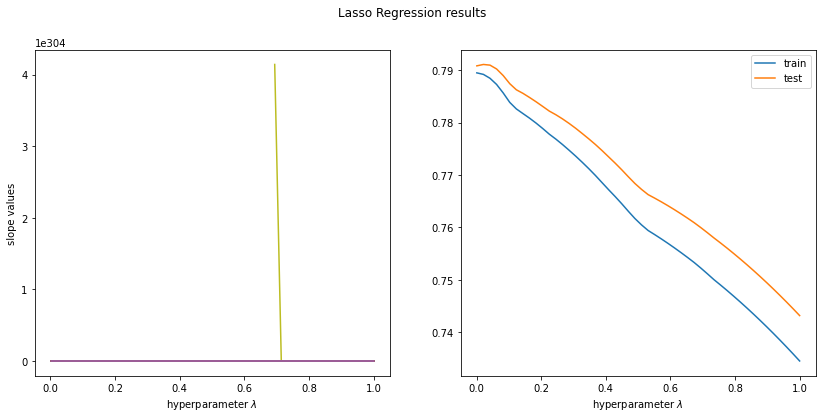

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [60]:
coefs_lasso.loc[0.001000,coefs_lasso.loc[0.001000,:] != 0].sort_values(ascending=False)

income_200000_or_more                    13526.527324
male_64_over                              3087.198005
female_30_to_39                           2616.226681
other_race_pop                            2382.787638
income_100000_199999                      2241.400407
female_40_to_64                           1971.433037
commuters_by_public_transportation        1543.512487
dwellings_2_to_49_units                   1472.984818
male_20_to_29                             1308.796007
female_64_over                            1219.803777
female_20_to_29                            995.972521
commute_60_more_mins                       989.739971
commute_30_to_59                           982.416149
vacant_housing_units                       633.304218
income_less_10000                          487.399549
hispanic_pop                               466.063673
mobile_homes                               336.946142
black_pop                                  313.857531
dwellings_50_or_more_units  

In [41]:
#cali_top5_reduced.to_csv('data/cali_top5_reduced.csv', index = False)

In [42]:
# # Removing redundant ethnic variables
# cali_top5_df = cali_top5_df.drop(columns = ['amerindian_including_hispanic','asian_including_hispanic',
#                                             'black_including_hispanic','not_hispanic_pop',
#                                             'two_or_more_races_pop','white_including_hispanic',
#                                             'hispanic_any_race'])

In [43]:
# # Removing redundant sex/education variables
# cali_top5_df = cali_top5_df.drop(columns = ['male_45_64_associates_degree','male_45_64_bachelors_degree',
#                                             'male_45_64_grade_9_12','male_45_64_graduate_degree',
#                                             'male_45_64_high_school','male_45_64_less_than_9_grade',
#                                             'male_45_64_some_college'])

In [44]:
# # Removing redundant education variables
# cali_top5_df = cali_top5_df.drop(columns = ['in_grades_1_to_4','in_grades_5_to_8','in_grades_9_to_12',
#                                             'in_undergrad_college','bachelors_degree_2',
#                                             'bachelors_degree_or_higher_25_64','masters_degree',
#                                             'high_school_diploma','high_school_including_ged',
#                                             'some_college_and_associates_degree','one_year_more_college'])

In [45]:
# # Removing redundant population variables
# cali_top5_df = cali_top5_df.drop(columns = ['population_1_year_and_over','population_3_years_over',
#                                             'pop_5_years_over','pop_15_and_over',
#                                             'pop_16_over','pop_25_64',
#                                             'pop_25_years_over','pop_divorced','pop_never_married',
#                                             'pop_now_married','pop_separated','pop_widowed'])

In [46]:
# # Removing redundant commuting variables
# cali_top5_df = cali_top5_df.drop(columns = ['commuters_by_bus','commuters_by_car_truck_van',
#                                             'commuters_by_carpool','commuters_by_subway_or_elevated',
#                                             'commuters_drove_alone','no_car','no_cars','one_car',
#                                             'two_cars','three_cars','four_more_cars',
#                                             'aggregate_travel_time_to_work'])

In [47]:
# # Removing redundant housing/rent variables
# cali_top5_df = cali_top5_df.drop(columns = ['rent_under_10_percent','rent_10_to_15_percent',
#                                             'rent_15_to_20_percent','rent_20_to_25_percent',
#                                             'rent_25_to_30_percent','rent_30_to_35_percent',
#                                             'rent_35_to_40_percent','rent_40_to_50_percent',
#                                             'rent_burden_not_computed','rent_over_50_percent',
#                                             'renter_occupied_housing_units_paying_cash_median_gross_rent',
#                                             'owner_occupied_housing_units','owner_occupied_housing_units_lower_value_quartile',
#                                             'owner_occupied_housing_units_median_value',
#                                             'owner_occupied_housing_units_upper_value_quartile','family_households',
#                                             'nonfamily_households','different_house_year_ago_different_city',
#                                             'different_house_year_ago_same_city'])

In [48]:
# # Removing redundant family variables
# cali_top5_df = cali_top5_df.drop(columns = ['two_parent_families_with_young_children',
#                                             'two_parents_father_in_labor_force_families_with_young_children',
#                                             'two_parents_in_labor_force_families_with_young_children',
#                                             'two_parents_mother_in_labor_force_families_with_young_children',
#                                             'two_parents_not_in_labor_force_families_with_young_children',
#                                             'speak_only_english_at_home','speak_spanish_at_home',
#                                             'speak_spanish_at_home_low_english','families_with_young_children',
#                                             'father_in_labor_force_one_parent_families_with_young_children',
#                                             'father_one_parent_families_with_young_children',
#                                             'children_in_single_female_hh'])